In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# credit to zachwill (https://gist.github.com/zachwill/d5190af1a7f455dea45d)
# for the seaborn color palette based on 538 data visualizations
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)

In [2]:
df = pd.read_csv('./shots/shot_data.csv')

In [3]:
df.head()

,Unnamed: 0,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,0,Shot Chart Detail,21600003,19,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,...,Right Side Center(RC),24+ ft.,28,130,257,1,0,20161025,GSW,SAS
1,1,Shot Chart Detail,21600003,28,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,...,Right Side Center(RC),24+ ft.,25,189,174,1,1,20161025,GSW,SAS
2,2,Shot Chart Detail,21600003,88,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,...,Right Side Center(RC),24+ ft.,27,159,229,1,0,20161025,GSW,SAS
3,3,Shot Chart Detail,21600003,91,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,...,Right Side Center(RC),16-24 ft.,21,163,141,1,0,20161025,GSW,SAS
4,4,Shot Chart Detail,21600003,184,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,...,Center(C),24+ ft.,26,-9,267,1,1,20161025,GSW,SAS


In [4]:
df.columns

Index(['Unnamed: 0', 'GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID',
       'PLAYER_NAME', 'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [5]:
relevant_data = df.drop(['Unnamed: 0', 'GRID_TYPE', 'GAME_EVENT_ID', 'PLAYER_ID', 'TEAM_ID', 'EVENT_TYPE'], axis=1)

In [6]:
relevant_data.columns

Index(['GAME_ID', 'PLAYER_NAME', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'ACTION_TYPE', 'SHOT_TYPE', 'SHOT_ZONE_BASIC',
       'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM'],
      dtype='object')

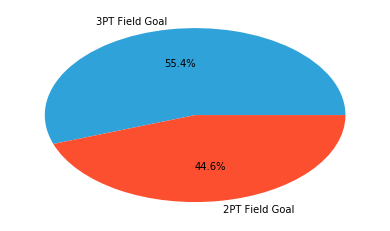

In [7]:
def proportion_of_twos_versus_threes(data):
    grouped_shots = data.groupby("SHOT_TYPE")['SHOT_TYPE']
    plt.pie(grouped_shots.count(), labels=data.SHOT_TYPE.unique(), autopct='%1.1f%%')
proportion_of_twos_versus_threes(relevant_data)

In [8]:
league_data = pd.read_csv('./data/league_averages.csv')
league_data.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2018-19,NBA,26.3,6-7,218,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4
1,2,2017-18,NBA,26.4,6-7,219,1230,241.4,39.6,86.1,...,106.3,0.460,0.362,0.767,97.3,0.521,13.0,22.3,0.193,108.6
2,3,2016-17,NBA,26.6,6-7,220,1230,241.6,39.0,85.4,...,105.6,0.457,0.358,0.772,96.4,0.514,12.7,23.3,0.209,108.8
3,4,2015-16,NBA,26.7,6-7,221,1230,241.8,38.2,84.6,...,102.7,0.452,0.354,0.757,95.8,0.502,13.2,23.8,0.209,106.4
4,5,2014-15,NBA,26.7,6-7,222,1230,242.0,37.5,83.6,...,100.0,0.449,0.350,0.750,93.9,0.496,13.3,25.1,0.205,105.6


In [9]:
league_data.columns

Index(['Rk', 'Season', 'Lg', 'Age', 'Ht', 'Wt', 'G', 'MP', 'FG', 'FGA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'FG%', '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'ORtg'],
      dtype='object')

In [10]:
league_data = league_data.drop(['Lg', 'Age', 'Ht', 'Wt', 'G'], axis=1)

In [11]:
league_data.head()
league_data['Year'] = league_data['Season']

In [12]:
for i, row in league_data.iterrows():
    res = league_data.at[i, 'Year'].split('-')
    league_data.at[i, 'Year'] = '20' + res[1]

In [13]:
plt.figure(figsize=(16,6))

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

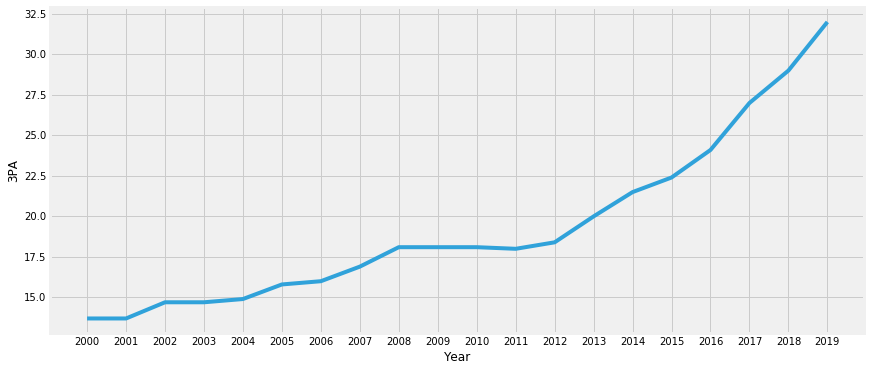

In [14]:
plt.figure(figsize=(13, 6))
sns.lineplot(x='Year', y='3PA', data=league_data, palette=five_thirty_eight)

In [15]:
player_data = pd.read_csv('./data/player_data.csv')

In [16]:
player_data = player_data.drop(['Rk', 'Unnamed: 0'], axis=1)

In [17]:
player_data.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [18]:
three_pointers_by_year = player_data.groupby('Year')['3PA'].sum()

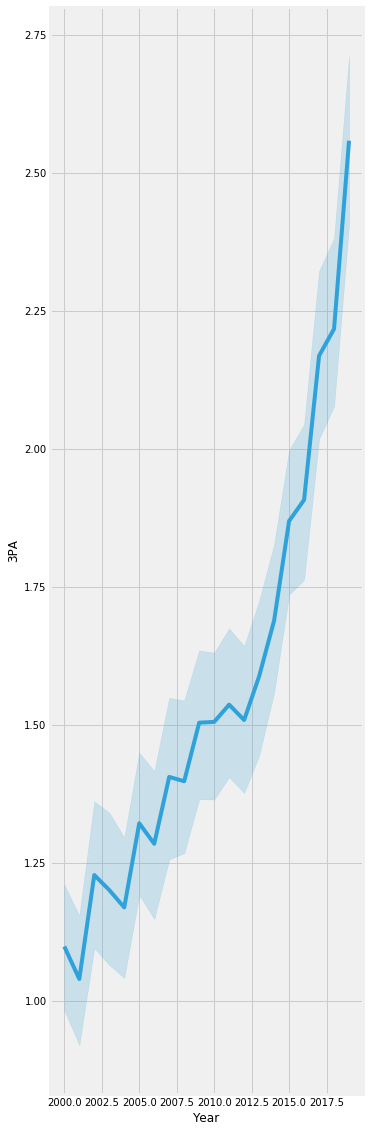

In [19]:
import numpy as np
plt.figure(figsize=(5,20))
sns.lineplot(x='Year', y='3PA', data=player_data)
plt.show()